In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from Bio import SeqIO
# plt.style.use("seaborn")


C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                          Correct  Total      Ratio
Domain function in total      177    215  82.325581
Extender units                 72     92  78.260870
Non-extending domains         103    123  83.739837
Starter units                   5      8  62.500000


Text(82, 0, '175/223')

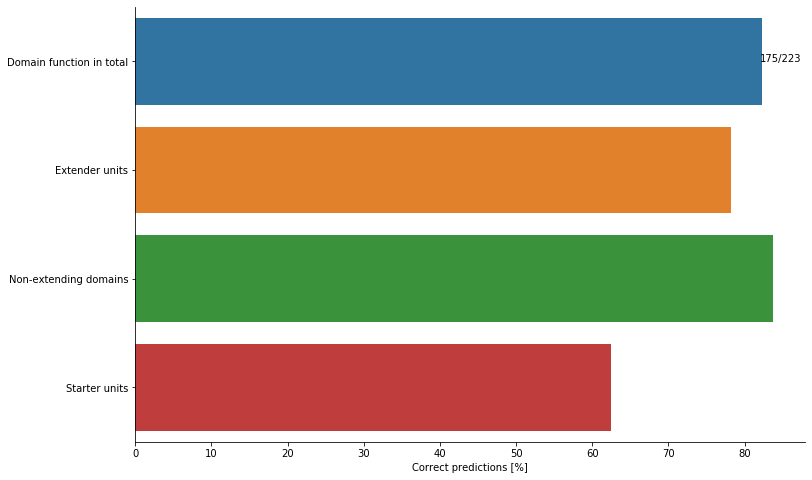

In [29]:
prediction_scores = {
    "Domain function in total": [177, 215],
    "Extender units": [72, 92],
    "Non-extending domains": [103, 123],
    "Starter units": [5, 8]}


fig, ax = plt.subplots(1, figsize = (12, 8))
df = pd.DataFrame(prediction_scores).T
df.columns = ["Correct", "Total"]
df["Ratio"] = 100*df["Correct"] / df["Total"]
print(df)
b = sns.barplot(y = df.index, x = "Ratio", data = df, ax = ax)
sns.despine()
ax.set_xlabel("Correct predictions [%]")
ax.set_ylabel("")
ax.annotate("175/223", (82, -0))

In [22]:
for bar in b.patches:
    print(bar.get_height())
    print(bar.get_xy())

0.8
(0, -0.4)
0.8
(0, 0.6)
0.8
(0, 1.6)
0.8
(0, 2.6)


# Figure 2


In [68]:
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt

In [157]:
def _get_strain_knowledge(cluster_path):  # yes
    gb_list = []
    for gb_record in SeqIO.parse(open(cluster_path, "r"), "genbank"):
        gb_list.append(gb_record)
    g = gb_list[0]
    return g.annotations["taxonomy"]

In [3]:
""" Create the figure displaying the number of successful bigmec constructions"""
filename = "../Data/constructed_pathways/summary.csv"
df = pd.read_csv(filename, index_col = 0)
print(df)

       BGC  Success     BGC type
0        1        1        T1PKS
1       10        0          NaN
2      100        1        T1PKS
3     1000        1         NRPS
4     1001        1         NRPS
...    ...      ...          ...
1878   995        1  transAT-PKS
1879   996        1         NRPS
1880   997        1         NRPS
1881   998        1         NRPS
1882   999        1         NRPS

[1883 rows x 3 columns]


In [47]:
# Rename
df_success = df.loc[df["Success"]== 1, :]
bgc_type_merge =  []
for x in  df_success["BGC type"]:
    lst = x.split("-")
    if (len(lst) > 1) and lst[0]==lst[1]:
        bgc_type_merge.append(lst[0])
    else:
        bgc_type_merge.append(x)
        
df_success["BGC class"] = bgc_type_merge

C:\Users\snorres\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [54]:
cluster_types = df_success.groupby("BGC class").count()

In [63]:
cluster_types["BGC"].name = ""

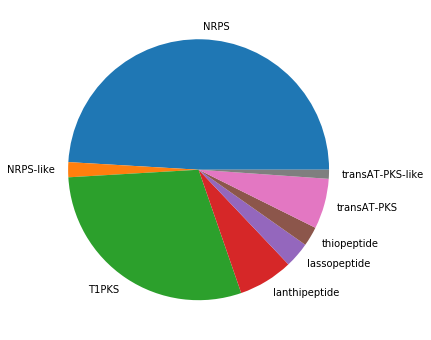

In [69]:
# Convert to treemap
fig = cluster_types["BGC"].plot(title = None, figsize = (6, 6), kind = "pie")
plt.savefig("bigmec_pie_chart.svg")

In [149]:
df_success

,BGC,Success,BGC type,BGC class
0,1,1,T1PKS,T1PKS
2,100,1,T1PKS,T1PKS
3,1000,1,NRPS,NRPS
4,1001,1,NRPS,NRPS
5,1002,1,NRPS,NRPS
...,...,...,...,...
1878,995,1,transAT-PKS,transAT-PKS
1879,996,1,NRPS,NRPS
1880,997,1,NRPS,NRPS
1881,998,1,NRPS,NRPS


In [158]:
bgc_ids = list(df_success["BGC"])
taxonomy_list = []
for i in bgc_ids:
    fn = "../Data/mibig/{0}.gbk".format(i)
    tax = _get_strain_knowledge(fn)
    taxonomy_list.append(tax)

In [209]:
df_tax = pd.DataFrame(taxonomy_list)
df_tax = df_tax.sort_values(0)

In [160]:
df_tax

,0,1,2,3,4,5,6,7,8,9,10,11
0,Bacteria,Actinobacteria,Micromonosporales,Micromonosporaceae,Verrucosispora,None,None,None,None,None,None,None
1,Bacteria,Actinobacteria,Streptomycetales,Streptomycetaceae,Streptomyces,None,None,None,None,None,None,None
2,Bacteria,Cyanobacteria,Oscillatoriophycideae,Oscillatoriales,Oscillatoriaceae,Lyngbya,None,None,None,None,None,None
3,Bacteria,Cyanobacteria,Oscillatoriophycideae,Oscillatoriales,Oscillatoriaceae,Lyngbya,None,None,None,None,None,None
4,Bacteria,Actinobacteria,Streptomycetales,Streptomycetaceae,Streptomyces,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1071,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,None,None,None,None,None,None
1072,Bacteria,Actinobacteria,Streptomycetales,Streptomycetaceae,Streptomyces,None,None,None,None,None,None,None
1073,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,None,None,None,None,None,None,None,None
1074,Bacteria,Actinobacteria,Streptomycetales,Streptomycetaceae,Streptomyces,None,None,None,None,None,None,None


In [240]:
#g1 = df_tax.groupby([1, 2]).size().unstack(fill_value = 0)
g1 = df_tax.groupby(1).size()
g01 = df_tax.groupby([0, 1]).size().unstack(fill_value = 0)

In [241]:
g0 = df_tax.groupby(0).size()

In [242]:
g1["Fungi"] = g1.pop("Fungi")


In [243]:
 206

206

In [244]:
g1["Others"] = g1[g1<5].sum()
g1.name = ""

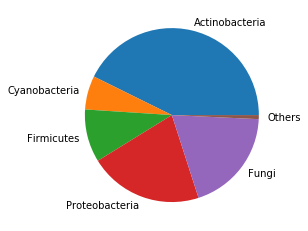

In [245]:
g1[g1>5].plot(kind = "pie", )

[None, None, None, None, None, None, None, None, None, None, None, None]

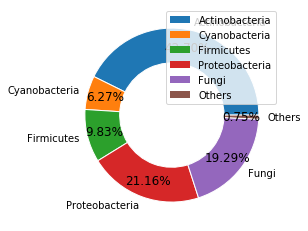

In [256]:
pie,_,txt = plt.pie(g1[g1>5], labels = g1[g1>5].index, radius = 1,autopct='%1.2f%%',  pctdistance=.8, )
plt.legend(loc = )
width = 0.4
plt.setp(pie, width=width, edgecolor='white')
plt.setp(txt, size = 12)#, weight="bold")
#pi2, _ = plt.pie(g0, radius = 0.8)

# Figure knockouts


In [73]:

fn = "../Data/knockouts/all_optknock_results_0.5.csv"
df = pd.read_csv(fn)

In [97]:
g = df.groupby("BGC")

In [95]:
idx = g["Production", "B"].max()

BGC
1      1.039022
2      1.018925
4      1.061759
6      1.061759
7      1.061759
         ...   
463    1.002992
465    1.009644
467    1.024900
682    1.061759
684    1.061759
Name: Production, Length: 225, dtype: float64

In [101]:
max_rows = []
for i, group in g:
    maxx = group["Production"].max()
    ix = group["Production"] == maxx
    selected = group.loc[ix, :]
    
    max_rows += list(selected.index)
    

In [142]:
max_df = df.loc[max_rows, ["ID", "BGC type"]]

In [143]:
count_df = max_df.groupby(['ID', 'BGC type']).size().unstack(fill_value=0)

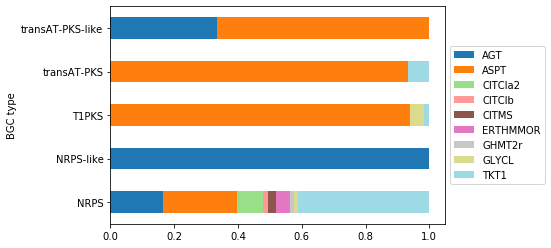

In [145]:
count_df_ratio = count_df/count_df.sum(axis = 0)
count_df_ratio.T.plot(kind = "barh", stacked = True, cmap = "tab20")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [100]:
list(selected.index)

[367]

In [123]:
count_df_full = df.groupby(['ID', 'BGC type']).size().unstack(fill_value=0)

In [129]:
count_df_full_ratio = count_df_full/count_df_full.sum(axis = 0)

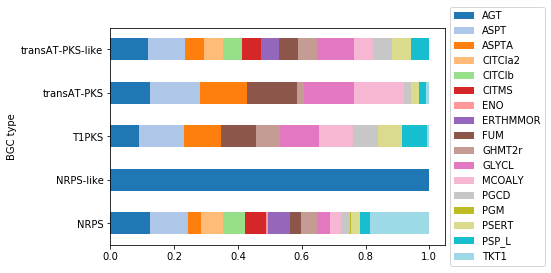

In [134]:
count_df_full_ratio.T.plot(kind = "barh", stacked = True, cmap = "tab20")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

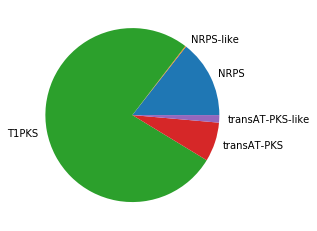

In [139]:
all_count = df.groupby("BGC type").count()["BGC"]
all_count.name = ""
all_count.plot(kind = "pie")